# Sobre o conjunto de dados
# Utilize 17 características clínicas para prever o estado de sobrevivência de pacientes com cirrose hepática. Os estados de sobrevivência incluem 0 = D (morte), 1 = C (censurado), 2 = CL (censurado devido a transplante de fígado).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('cirrhosis.csv')
base.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
display(base.info())
base=base.dropna()
display(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

None

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombin    

None

In [4]:
base  = base.drop('ID', axis=1)
display(base)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [5]:
display(base['Status'].value_counts(normalize=True).map("{:.1%}".format))

Status
C     53.3%
D     40.2%
CL     6.5%
Name: proportion, dtype: object

Text(0.5, 0, 'Status')

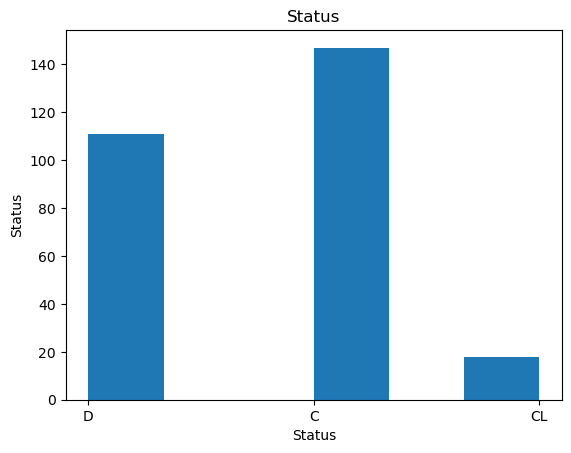

In [6]:
plt.hist(base.iloc[:,1], bins = 6)
plt.title('Status')
plt.ylabel('Status')
plt.xlabel('Status')

In [7]:
display(base['Drug'].value_counts(normalize=True).map("{:.1%}".format))

Drug
Placebo            50.7%
D-penicillamine    49.3%
Name: proportion, dtype: object

In [8]:
base.groupby(['Status', 'Drug']).agg({'Drug': 'count'}).rename(columns={'Status': 'count'})

Drug
Status Drug                 
C      D-penicillamine    70
       Placebo            77
CL     D-penicillamine     9
       Placebo             9
D      D-penicillamine    57
       Placebo            54

Text(0.5, 0, 'Drug')

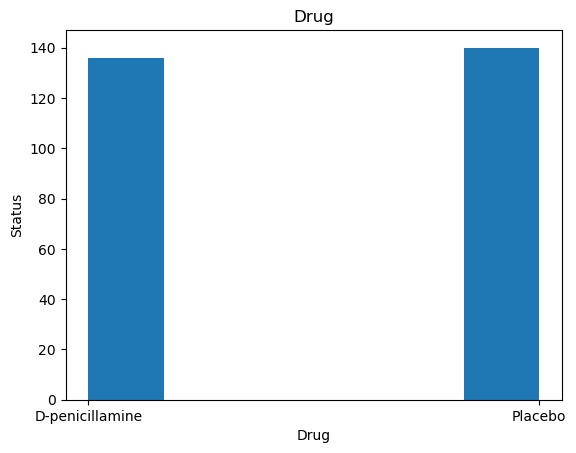

In [9]:
plt.hist(base.iloc[:,2], bins=6)
plt.title('Drug')
plt.ylabel('Status')
plt.xlabel('Drug')

In [10]:
base.groupby(['Sex','Drug']).agg({'Drug':'count'}).rename(columns={'Drug':'count'})

count
Sex Drug                  
F   D-penicillamine    116
    Placebo            126
M   D-penicillamine     20
    Placebo             14

In [11]:
base.groupby(['Status','Sex']).agg({'Sex':'count'}).rename(columns={'Sex':'count'})

count
Status Sex       
C      F      137
       M       10
CL     F       15
       M        3
D      F       90
       M       21

In [12]:
display(base['Sex'].value_counts(normalize=True).agg('{:.1%}'.format))

Sex
F    87.7%
M    12.3%
Name: proportion, dtype: object

Text(0, 0.5, 'sex')

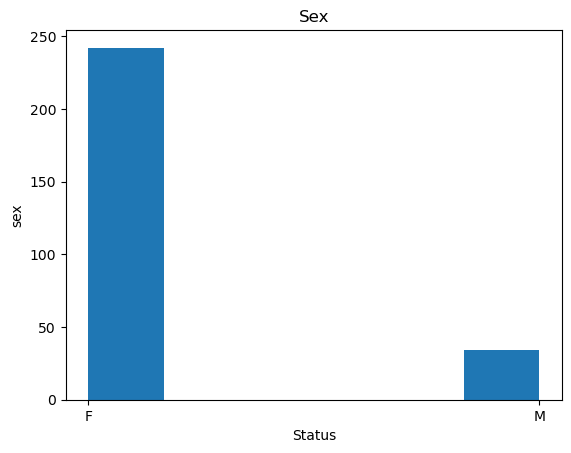

In [13]:
plt.hist(base.iloc[:,4], bins = 6)
plt.title('Sex')
plt.xlabel('Status')
plt.ylabel('sex')

In [14]:
#base = base.groupby(['Autor'])['Avaliação do utilizador'].mean()
#base

In [14]:
display(base['Ascites'].value_counts(normalize = True).agg('{:.1%}'.format))

Ascites
N    93.1%
Y     6.9%
Name: proportion, dtype: object

In [15]:
base.groupby(['Status', 'Ascites']).agg({'Ascites': 'count'}).rename(columns={'Ascites': 'count'})

count
Status Ascites       
C      N          146
       Y            1
CL     N           18
D      N           93
       Y           18

In [17]:
base.groupby(['Sex', 'Ascites']).agg({'Ascites':'count'}).rename(columns={'Ascites': 'count'})

count
Sex Ascites       
F   N          225
    Y           17
M   N           32
    Y            2

In [18]:
base.groupby(['Drug', 'Ascites']).agg({'Ascites':'count'}).rename(columns={'Ascites':'count'})

count
Drug            Ascites       
D-penicillamine N          125
                Y           11
Placebo         N          132
                Y            8

In [19]:
display(base['Hepatomegaly'].value_counts(normalize = True).agg('{:.1%}'.format))

Hepatomegaly
Y    51.4%
N    48.6%
Name: proportion, dtype: object

Text(0.5, 0, 'Ascites')

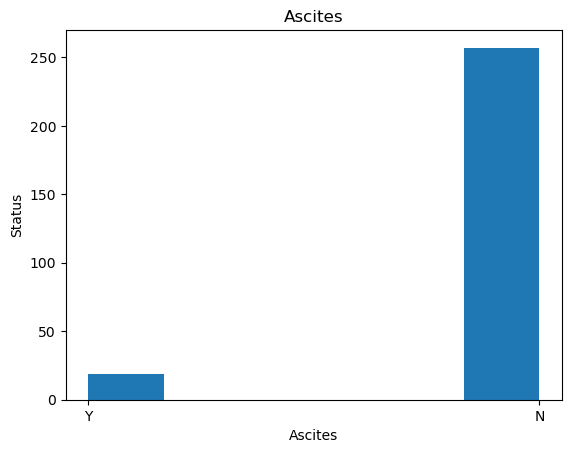

In [20]:
plt.hist(base.iloc[:,5], bins = 6)
plt.title('Ascites')
plt.ylabel('Status')
plt.xlabel('Ascites')

In [21]:
base.groupby(['Status', 'Hepatomegaly']).agg({'Hepatomegaly': 'count'}).rename(columns={'Hepatomegaly':'count'})

count
Status Hepatomegaly       
C      N                92
       Y                55
CL     N                 6
       Y                12
D      N                36
       Y                75

In [22]:
base.groupby(['Drug', 'Hepatomegaly']).agg({'Hepatomegaly':'count'}).rename(columns={'Hepatomegaly': 'count'})

count
Drug            Hepatomegaly       
D-penicillamine N                72
                Y                64
Placebo         N                62
                Y                78

In [23]:
base.groupby(['Sex', 'Hepatomegaly']).agg({'Hepatomegaly': 'count'}).rename(columns={'Hepatomegaly': 'count'})

count
Sex Hepatomegaly       
F   N               120
    Y               122
M   N                14
    Y                20

In [24]:
display(base['Hepatomegaly'].value_counts(normalize = True).agg('{:.1%}'.format))

Hepatomegaly
Y    51.4%
N    48.6%
Name: proportion, dtype: object

Text(0.5, 0, 'Hepatomegaly')

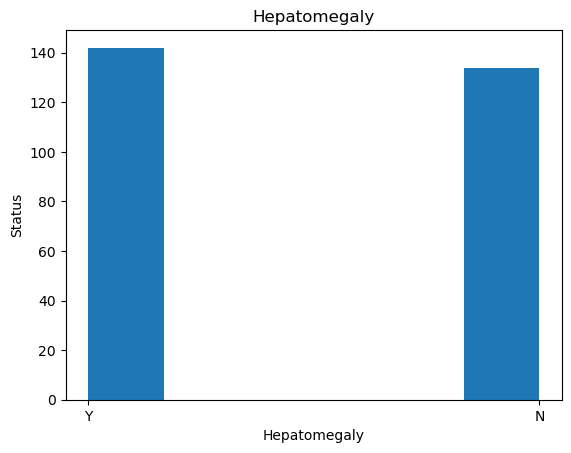

In [25]:
plt.hist(base.iloc[:,6], bins= 6)
plt.title('Hepatomegaly')
plt.ylabel('Status')
plt.xlabel('Hepatomegaly')

In [26]:
base.groupby(['Status', 'Spiders']).agg({'Spiders':'count'}).rename(columns={'Spiders': 'count'})

count
Status Spiders       
C      N          118
       Y           29
CL     N           13
       Y            5
D      N           65
       Y           46

In [27]:
base.groupby(['Drug', 'Spiders']).agg({'Spiders': 'count'}).rename(columns={'Spiders': 'count'})

count
Drug            Spiders       
D-penicillamine N           96
                Y           40
Placebo         N          100
                Y           40

In [28]:
base.groupby(['Sex', 'Spiders']).agg({'Spiders': 'count'}).rename(columns={'Spiders':'count'})

count
Sex Spiders       
F   N          166
    Y           76
M   N           30
    Y            4

In [29]:
display(base['Spiders'].value_counts(normalize=True).agg('{:.1%}'.format))

Spiders
N    71.0%
Y    29.0%
Name: proportion, dtype: object

Text(0.5, 0, 'Spiders')

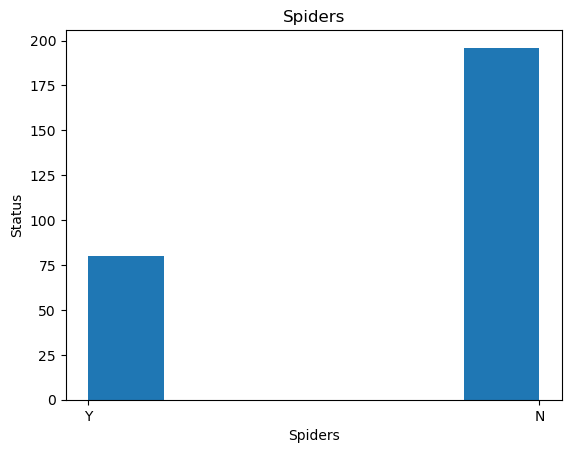

In [30]:
plt.hist(base.iloc[:,7], bins = 6)
plt.title('Spiders')
plt.ylabel('Status')
plt.xlabel('Spiders')

In [31]:
base.groupby(['Status', 'Edema']).agg({'Edema':'count'}).rename(columns={'Edema':'count'})

count
Status Edema       
C      N        139
       S          7
       Y          1
CL     N         16
       S          2
D      N         79
       S         16
       Y         16

In [32]:
base.groupby(['Sex', 'Edema']).agg({'Edema': 'count'}).rename(columns={'Edema':'count'})

count
Sex Edema       
F   N        206
    S         21
    Y         15
M   N         28
    S          4
    Y          2

In [33]:
base.groupby(['Drug', 'Edema']).agg({'Edema':'count'}).rename(columns= {'Edema':'count'})

count
Drug            Edema       
D-penicillamine N        112
                S         15
                Y          9
Placebo         N        122
                S         10
                Y          8

In [34]:
display(base['Edema'].value_counts(normalize=True).agg('{:.1%}'.format))

Edema
N    84.8%
S     9.1%
Y     6.2%
Name: proportion, dtype: object

Text(0.5, 0, 'Edema')

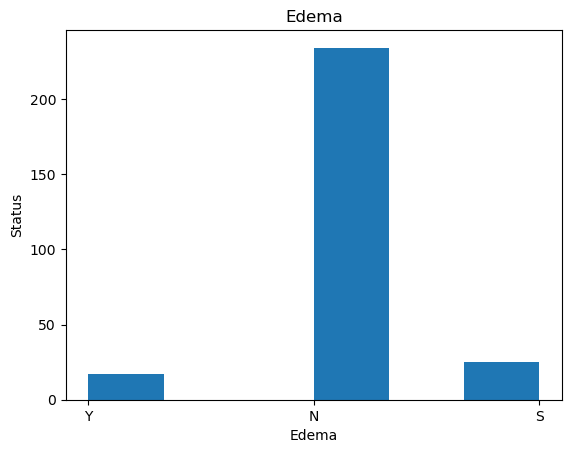

In [35]:
plt.hist(base.iloc[:,8], bins=6)
plt.title('Edema')
plt.ylabel('Status')
plt.xlabel('Edema')

In [36]:
base.groupby(['Status','Bilirubin']).agg({'Bilirubin': 'count'}).rename({'Bilirubin':'count'})

Bilirubin
Status Bilirubin           
C      0.3                1
       0.4                6
       0.5               15
       0.6               15
       0.7               17
...                     ...
D      21.6               1
       22.5               1
       24.5               1
       25.5               1
       28.0               1

[121 rows x 1 columns]

In [37]:
display(base['Bilirubin'].value_counts(normalize=True).agg('{:.1%}'.format))

Bilirubin
0.7    6.9%
1.1    6.2%
0.6    5.8%
0.5    5.8%
0.8    5.1%
       ... 
5.5    0.4%
6.7    0.4%
6.5    0.4%
7.3    0.4%
1.7    0.4%
Name: proportion, Length: 82, dtype: object

Text(0.5, 0, 'Bilirubin')

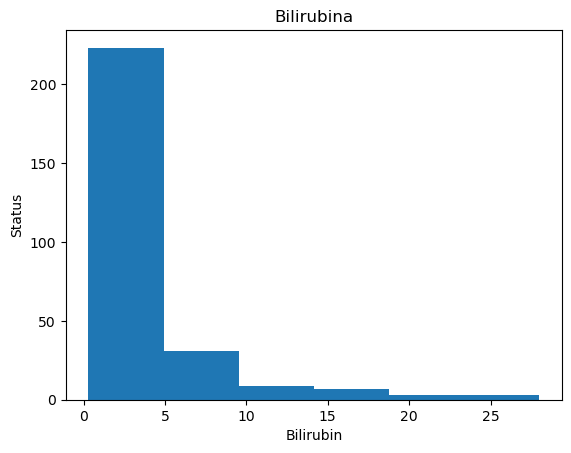

In [38]:
plt.hist(base.iloc[:,9], bins = 6)
plt.title('Bilirubina')
plt.ylabel('Status')
plt.xlabel('Bilirubin')

<Axes: xlabel='Status', ylabel='Bilirubin'>

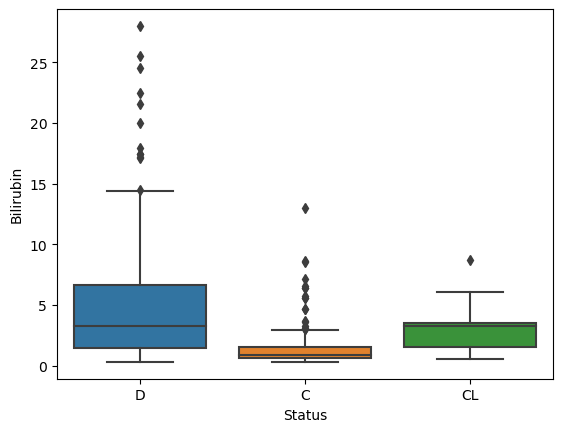

In [39]:
sns.boxplot(x=base['Status'], y=base['Bilirubin'])

In [40]:
base.groupby(['Status', 'Cholesterol']).agg({'Cholesterol': 'count'}).rename({'Cholesterol': 'count'})

Cholesterol
Status Cholesterol             
C      120.0                  1
       132.0                  1
       149.0                  1
       172.0                  1
       174.0                  1
...                         ...
D      1092.0                 1
       1128.0                 1
       1276.0                 1
       1600.0                 1
       1775.0                 1

[228 rows x 1 columns]

In [41]:
#base = base.groupby(['Status'])['Cholesterol'].mean()
#base

In [42]:
#base = base.groupby(['Drug'])['Cholesterol'].mean()
#base

In [43]:
#base = base.groupby(['Sex'])['Cholesterol'].mean()
#base

In [44]:
display(base['Cholesterol'].value_counts(normalize=True).agg('{:.1%}'.format))

Cholesterol
316.0    1.4%
260.0    1.4%
448.0    1.4%
236.0    1.1%
426.0    1.1%
         ... 
127.0    0.4%
120.0    0.4%
486.0    0.4%
528.0    0.4%
576.0    0.4%
Name: proportion, Length: 198, dtype: object

<Axes: xlabel='Status', ylabel='Cholesterol'>

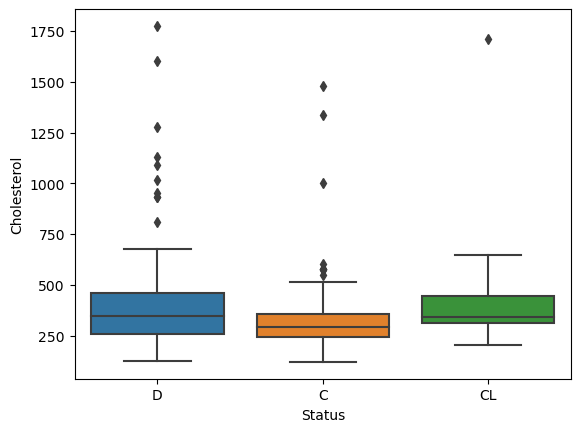

In [45]:
sns.boxplot(x=base['Status'], y=base['Cholesterol'])

<Axes: xlabel='Drug', ylabel='Cholesterol'>

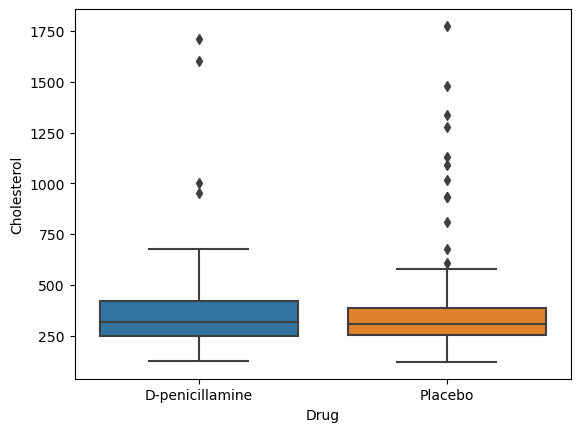

In [46]:
sns.boxplot(x=base['Drug'], y=base['Cholesterol'])

<Axes: xlabel='Sex', ylabel='Cholesterol'>

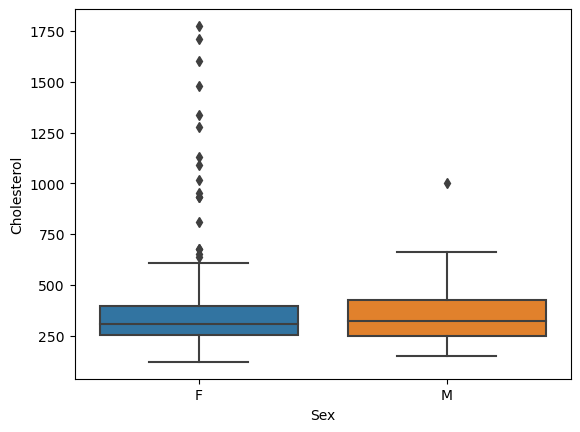

In [47]:
sns.boxplot(x=base['Sex'], y=base['Cholesterol'])

In [48]:
base.groupby(['Status', 'Albumin']).agg({'Albumin': 'count'}).rename({'Albumin': 'count'})

Albumin
Status Albumin         
C      2.75           1
       2.90           1
       2.93           1
       2.95           1
       2.97           2
...                 ...
D      4.09           1
       4.16           1
       4.22           2
       4.30           1
       4.40           1

[177 rows x 1 columns]

<Axes: xlabel='Status', ylabel='Albumin'>

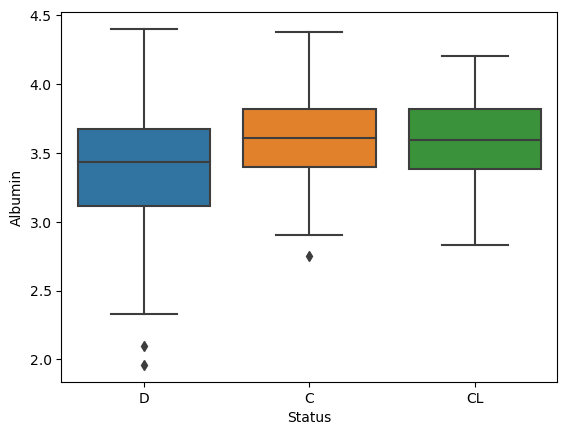

In [49]:
sns.boxplot(x=base['Status'], y=base['Albumin'])

<Axes: xlabel='Drug', ylabel='Albumin'>

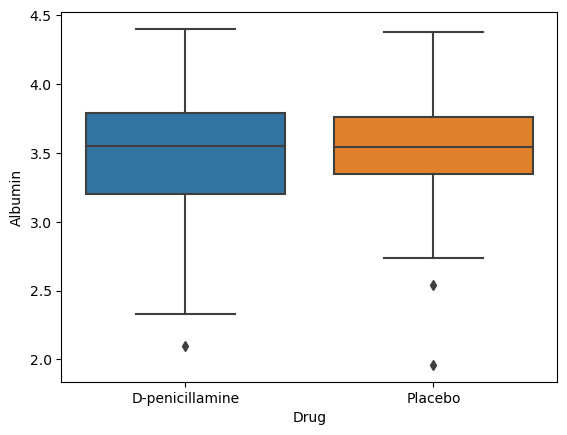

In [50]:
sns.boxplot(x=base['Drug'], y=base['Albumin'])

<Axes: xlabel='Sex', ylabel='Albumin'>

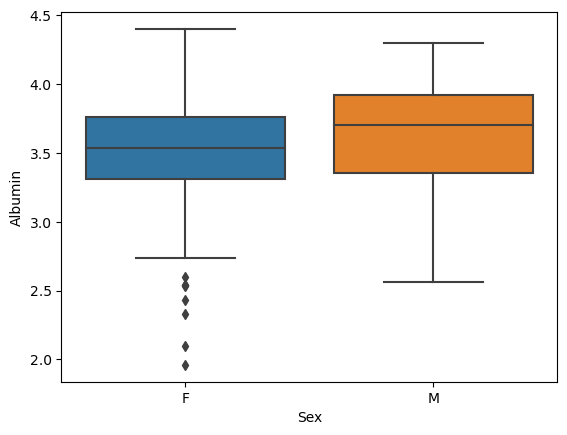

In [51]:
sns.boxplot(x=base['Sex'], y=base['Albumin'])

In [52]:
base.groupby(['Status', 'Copper']).agg({'Copper': 'count'}).rename({'Copper': 'count'})

Copper
Status Copper        
C      4.0          1
       9.0          2
       10.0         1
       11.0         2
       12.0         1
...               ...
D      290.0        1
       358.0        1
       464.0        1
       558.0        1
       588.0        1

[199 rows x 1 columns]

<Axes: xlabel='Status', ylabel='Copper'>

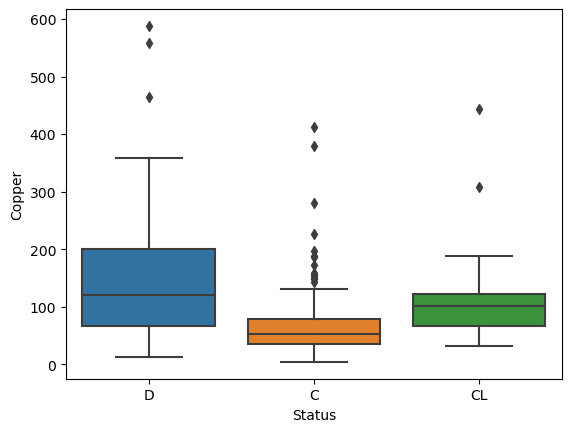

In [53]:
sns.boxplot(x=base['Status'], y=base['Copper'])

<Axes: xlabel='Drug', ylabel='Copper'>

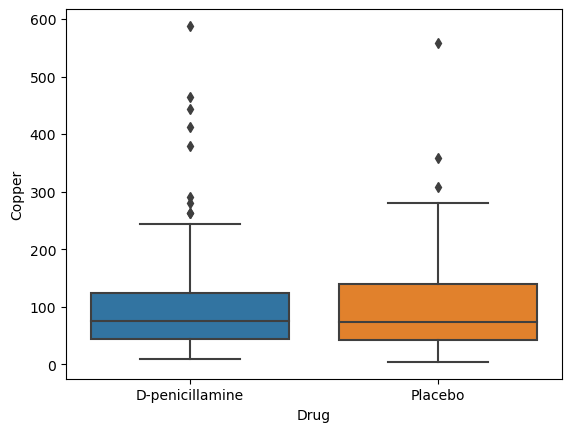

In [54]:
sns.boxplot(x=base['Drug'], y=base['Copper'])

<Axes: xlabel='Sex', ylabel='Copper'>

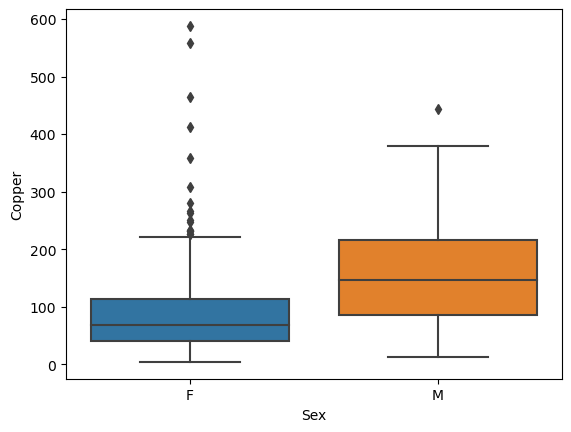

In [55]:
sns.boxplot(x=base['Sex'], y=base['Copper'])

In [56]:
display(base['Copper'].value_counts(normalize=True).agg('{:.1%}'.format))

Copper
52.0     2.9%
67.0     2.5%
75.0     2.2%
39.0     1.8%
13.0     1.4%
         ... 
178.0    0.4%
110.0    0.4%
154.0    0.4%
269.0    0.4%
186.0    0.4%
Name: proportion, Length: 152, dtype: object

In [58]:
base.groupby(['Status','Alk_Phos']).agg({'Alk_Phos': 'count'}).rename({'Alk_Phos': 'count'})

Alk_Phos
Status Alk_Phos          
C      289.0            1
       310.0            1
       369.0            1
       377.0            1
       414.0            1
...                   ...
D      10165.0          1
       11320.2          1
       11552.0          1
       12258.8          1
       13862.4          1

[273 rows x 1 columns]

In [59]:
display(base['Alk_Phos'].value_counts(normalize = True).agg('{:.1%}'.format))

Alk_Phos
815.0     0.7%
2276.0    0.7%
794.0     0.7%
1636.0    0.7%
7277.0    0.7%
          ... 
754.0     0.4%
979.0     0.4%
1040.0    0.4%
1584.0    0.4%
2115.0    0.4%
Name: proportion, Length: 269, dtype: object

<Axes: xlabel='Status', ylabel='Alk_Phos'>

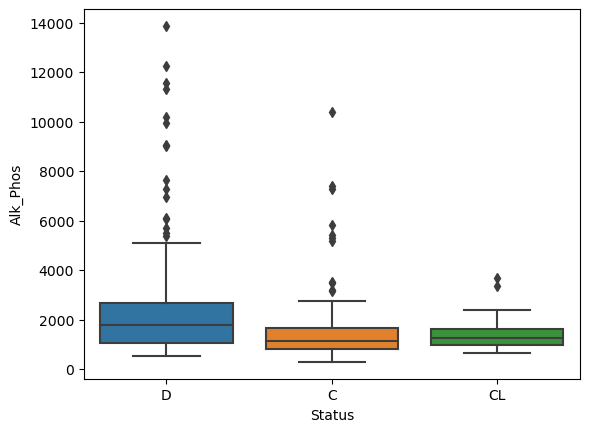

In [70]:
sns.boxplot(x=base['Status'], y=base['Alk_Phos'])

<Axes: xlabel='Drug', ylabel='Alk_Phos'>

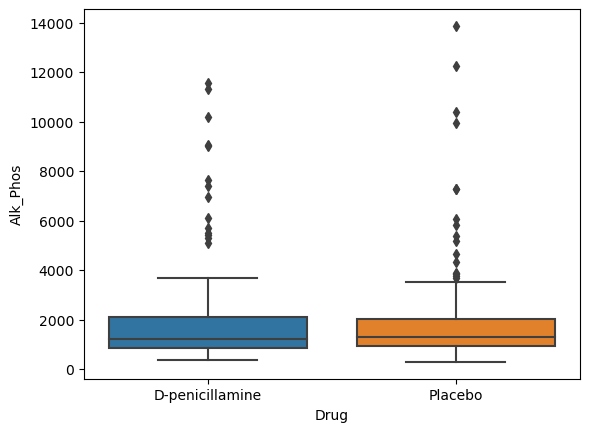

In [72]:
sns.boxplot(x=base['Drug'], y=base['Alk_Phos'])

<Axes: xlabel='Sex', ylabel='Alk_Phos'>

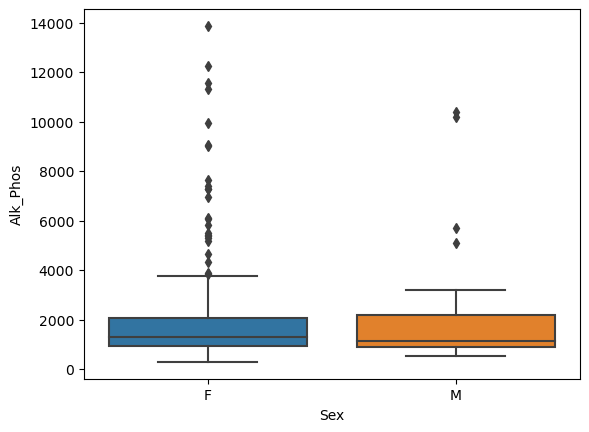

In [73]:
sns.boxplot(x=base['Sex'], y=base['Alk_Phos'])

In [61]:
base.groupby(['Status', 'SGOT']).agg({'SGOT': 'count'}).rename({'SGOT': 'count'})

SGOT
Status SGOT        
C      41.85      1
       43.40      1
       45.00      1
       49.60      1
       51.15      2
...             ...
D      246.45     1
       272.80     1
       280.55     1
       328.60     1
       338.00     1

[205 rows x 1 columns]

In [79]:
display(base['SGOT'].value_counts(normalize=True).agg('{:.1%}'.format))

SGOT
137.95    1.8%
71.30     1.8%
170.50    1.8%
120.90    1.8%
106.95    1.4%
          ... 
201.50    0.4%
82.56     0.4%
180.60    0.4%
67.08     0.4%
136.00    0.4%
Name: proportion, Length: 166, dtype: object

<Axes: xlabel='Status', ylabel='SGOT'>

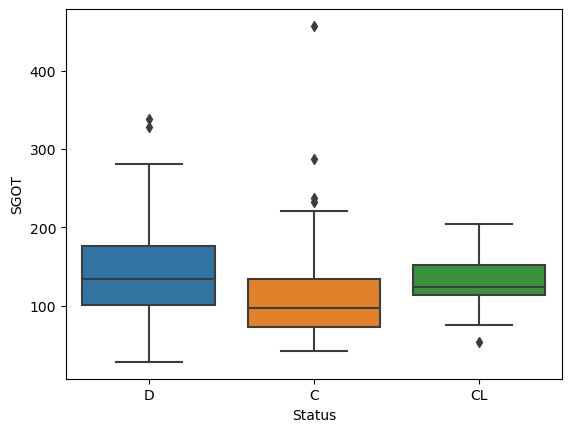

In [75]:
sns.boxplot(x=base['Status'], y=base['SGOT'])

<Axes: xlabel='Drug', ylabel='SGOT'>

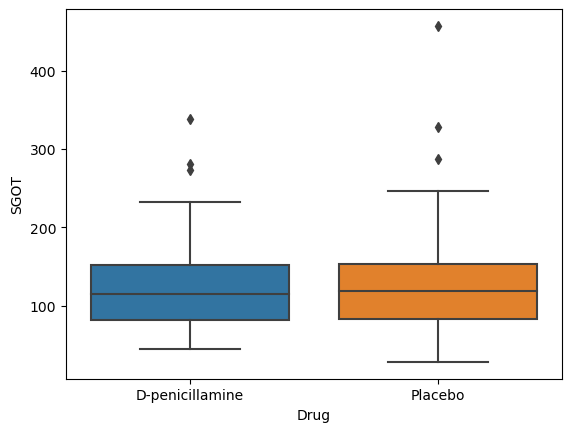

In [76]:
sns.boxplot(x=base['Drug'], y=base['SGOT'])

<Axes: xlabel='Sex', ylabel='SGOT'>

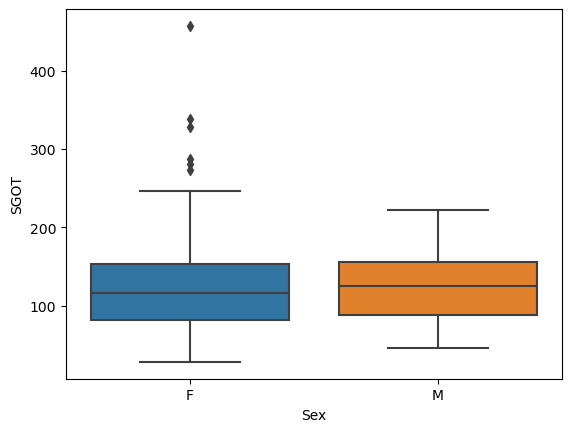

In [77]:
sns.boxplot(x=base['Sex'], y=base['SGOT'])

In [63]:
base.groupby(['Status', 'Tryglicerides']).agg({'Tryglicerides': 'count'}).rename({'Tryglicerides': 'count'})

Tryglicerides
Status Tryglicerides               
C      44.0                       2
       46.0                       1
       52.0                       2
       55.0                       3
       56.0                       4
...                             ...
D      309.0                      1
       318.0                      1
       319.0                      1
       432.0                      1
       598.0                      1

[200 rows x 1 columns]

In [80]:
display(base['Tryglicerides'].value_counts(normalize=True).agg('{:.1%}'.format))

Tryglicerides
90.0     2.2%
118.0    2.2%
91.0     2.2%
55.0     1.8%
56.0     1.8%
         ... 
272.0    0.4%
318.0    0.4%
243.0    0.4%
598.0    0.4%
82.0     0.4%
Name: proportion, Length: 143, dtype: object

<Axes: xlabel='Status', ylabel='Tryglicerides'>

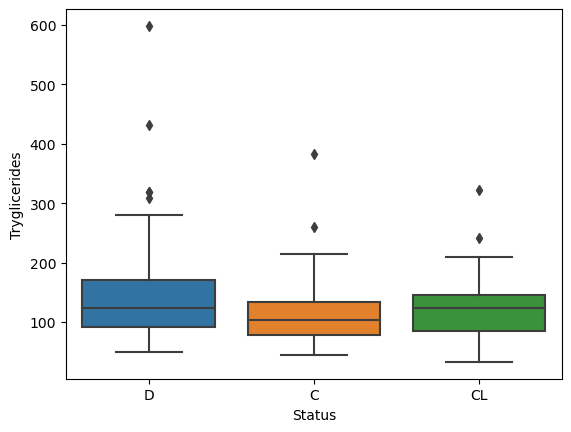

In [81]:
sns.boxplot(x=base['Status'], y=base['Tryglicerides'])

<Axes: xlabel='Drug', ylabel='Tryglicerides'>

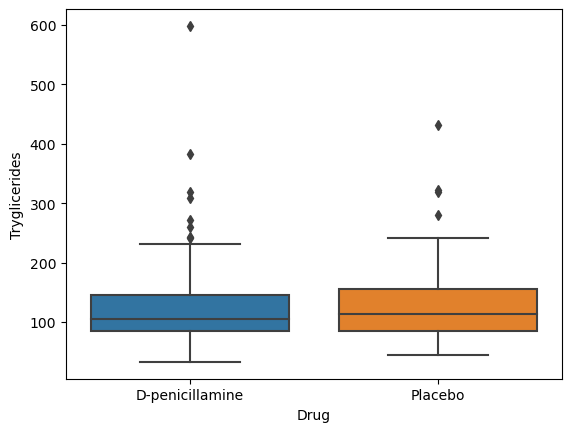

In [84]:
sns.boxplot(x=base['Drug'], y=base['Tryglicerides'])

<Axes: xlabel='Sex', ylabel='Tryglicerides'>

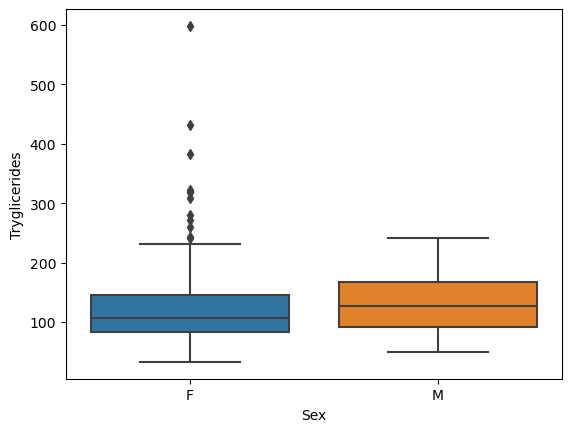

In [83]:
sns.boxplot(x=base['Sex'], y=base['Tryglicerides'])

In [64]:
base.groupby(['Status', 'Platelets']).agg({'Platelets':'count'}).rename({'Platelets': 'count'})

Platelets
Status Platelets           
C      79.0               1
       81.0               1
       95.0               2
       97.0               1
       117.0              1
...                     ...
D      431.0              1
       447.0              1
       471.0              1
       518.0              1
       563.0              1

[234 rows x 1 columns]

In [85]:
display(base['Platelets'].value_counts(normalize=True).agg('{:.1%}'.format))

Platelets
213.0    1.8%
344.0    1.8%
268.0    1.4%
228.0    1.4%
165.0    1.4%
         ... 
307.0    0.4%
266.0    0.4%
467.0    0.4%
141.0    0.4%
288.0    0.4%
Name: proportion, Length: 193, dtype: object

<Axes: xlabel='Status', ylabel='Platelets'>

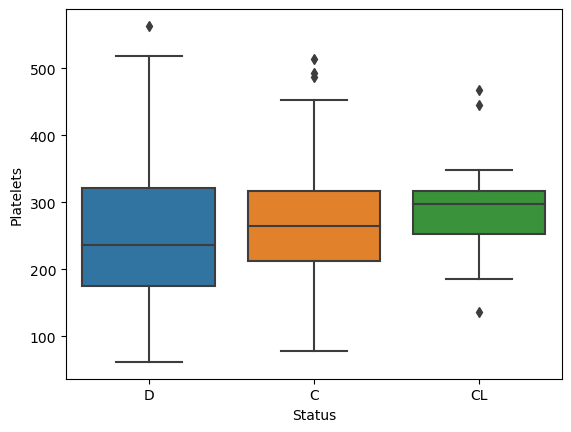

In [86]:
sns.boxplot(x=base['Status'], y=base['Platelets'])

<Axes: xlabel='Drug', ylabel='Platelets'>

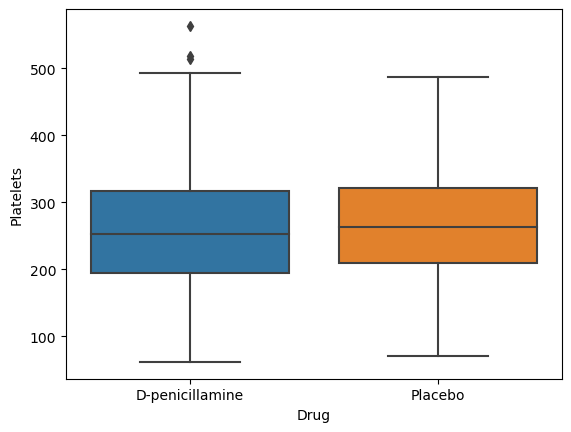

In [87]:
sns.boxplot(x=base['Drug'], y=base['Platelets'])

<Axes: xlabel='Sex', ylabel='Platelets'>

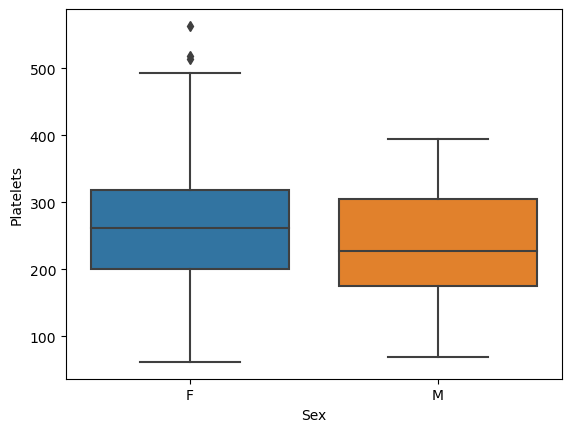

In [88]:
sns.boxplot(x=base['Sex'], y=base['Platelets'])

In [65]:
base.groupby(['Status', 'Prothrombin']).agg({'Prothrombin': 'count'}).rename({'Prothrombin':'COUNT'})

Prothrombin
Status Prothrombin             
C      9.0                    1
       9.1                    1
       9.4                    1
       9.5                    6
       9.6                   10
...                         ...
D      13.0                   2
       13.2                   3
       13.6                   1
       14.1                   1
       15.2                   1

[79 rows x 1 columns]

In [89]:
display(base['Prothrombin'].value_counts(normalize = True).agg('{:.1%}'.format))

Prothrombin
10.6    9.1%
11.0    7.6%
10.0    6.5%
9.8     6.2%
9.9     5.8%
10.1    5.1%
9.6     4.3%
10.2    3.6%
10.3    3.6%
11.5    3.3%
10.7    3.3%
11.2    3.3%
10.9    3.3%
10.8    2.9%
12.0    2.9%
10.5    2.9%
9.7     2.5%
9.5     2.5%
11.4    2.2%
11.1    2.2%
10.4    1.8%
11.6    1.8%
11.7    1.4%
12.4    1.4%
11.3    1.1%
13.0    1.1%
13.2    1.1%
11.8    0.7%
12.2    0.7%
11.9    0.7%
12.9    0.7%
12.1    0.7%
12.7    0.7%
17.1    0.4%
9.4     0.4%
14.1    0.4%
13.6    0.4%
9.0     0.4%
15.2    0.4%
9.1     0.4%
12.3    0.4%
Name: proportion, dtype: object

Text(0.5, 0, 'Prothrombin')

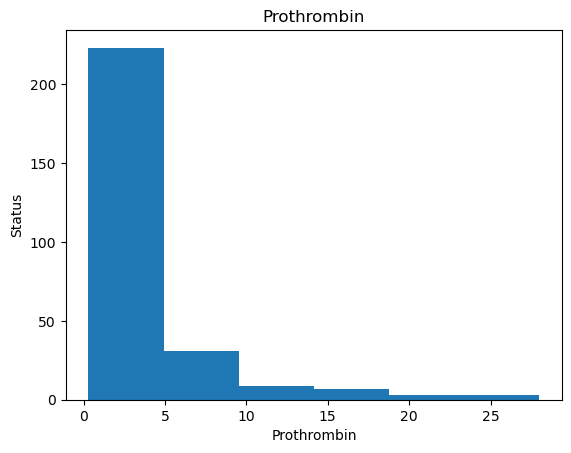

In [90]:
plt.hist(base.iloc[:,9], bins = 6)
plt.title('Prothrombin')
plt.ylabel('Status')
plt.xlabel('Prothrombin')

<Axes: xlabel='Status', ylabel='Prothrombin'>

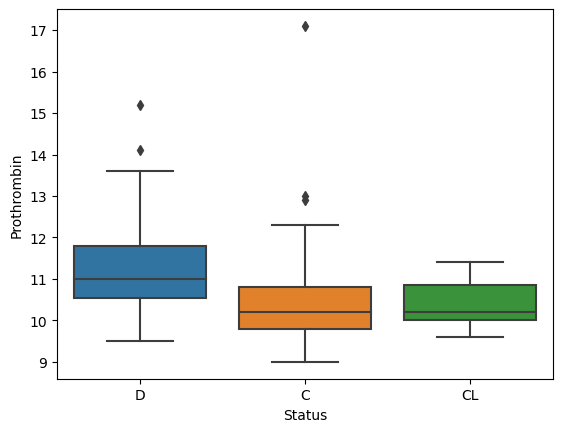

In [91]:
sns.boxplot(x=base['Status'], y=base['Prothrombin'])

<Axes: xlabel='Drug', ylabel='Prothrombin'>

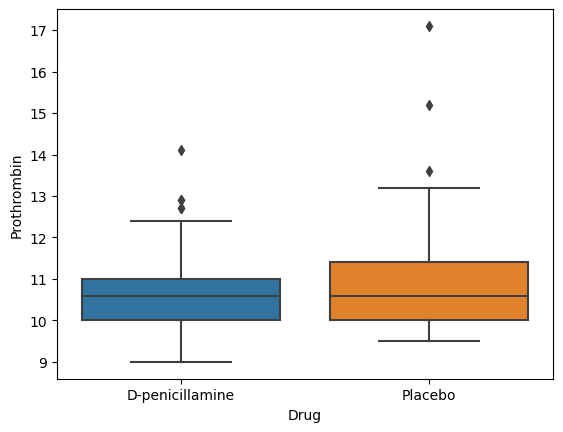

In [93]:
sns.boxplot(x=base['Drug'], y=base['Prothrombin'])

<Axes: xlabel='Sex', ylabel='Prothrombin'>

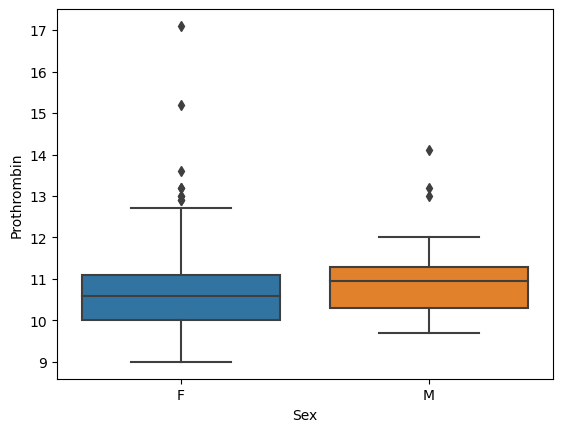

In [92]:
sns.boxplot(x=base['Sex'], y=base['Prothrombin'])

In [66]:
base.groupby(['Status', 'Stage']).agg({'Stage':'count'}).rename({'Stage':'count'})

Stage
Status Stage       
C      1.0       11
       2.0       42
       3.0       62
       4.0       32
CL     2.0        3
       3.0        8
       4.0        7
D      1.0        1
       2.0       14
       3.0       41
       4.0       55

In [21]:
base.groupby(['Sex', 'Stage']).agg({'Stage':'count'}).rename({'Stage':'count'})

Stage
Sex Stage       
F   1.0       10
    2.0       53
    3.0       99
    4.0       80
M   1.0        2
    2.0        6
    3.0       12
    4.0       14

In [95]:
display(base['Stage'].value_counts(normalize=True).agg('{:.1%}'.format))

Stage
3.0    40.2%
4.0    34.1%
2.0    21.4%
1.0     4.3%
Name: proportion, dtype: object

Text(0.5, 0, 'Stage')

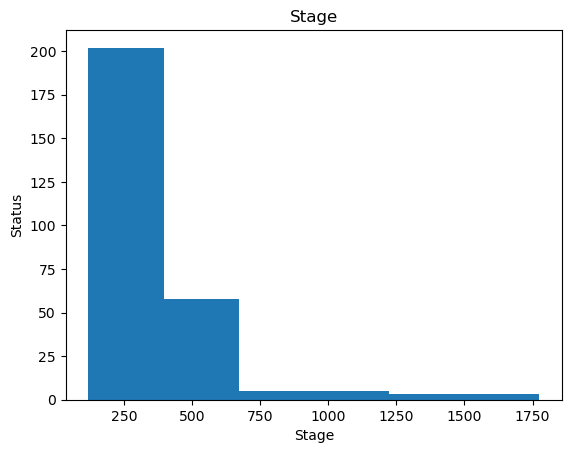

In [98]:
plt.hist(base.iloc[:,10], bins=6)
plt.title('Stage')
plt.ylabel('Status')
plt.xlabel('Stage')

Text(0.5, 0, 'Stage')

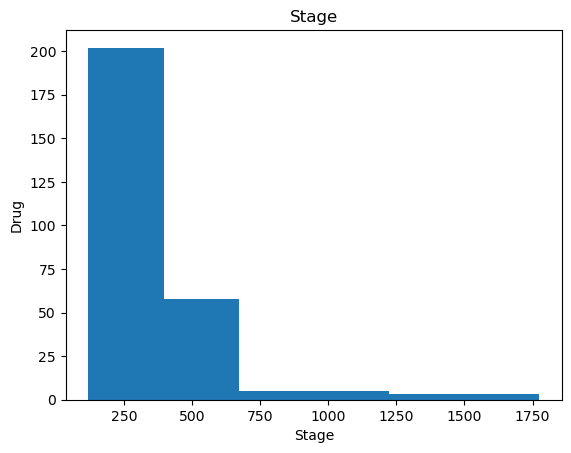

In [102]:
plt.hist(base.iloc[:,10], bins=6)
plt.title('Stage')
plt.ylabel('Drug')
plt.xlabel('Stage')

In [ ]:
sns.boxplot(x=base['Status', y=base[]])

<Axes: xlabel='Sex', ylabel='Stage'>

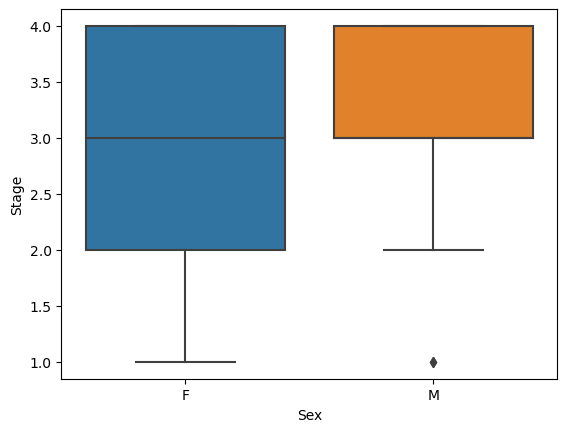

In [22]:
sns.boxplot(x=base['Sex'], y=base['Stage'])

1° Pela análise feita os os numeros de censurado é maior logo, mas os numeros de mortes não são muitos bons 

2° O número de placebos é maior que numeros de medicamentos em pessoas que mostram censurados, em pessoas que morreram o numero de mediacmentos é um pouco maior do que de placebos, o numero de censurados é a mesma 

3° O numero de mulheres que foram C é maior do que de homens, e o numero de D tambem é muito maior de entre mulheres do que de  homens, e de CL tambem 

4° Ascites: O numero de C é maior entre pessoas que não tem , D O numero de pessoas que morrem é mais comum em pessoas que não tem, CL  só mostra o não 

5° Hepatomegaly: Pessoas que morreram por hepatomegaly são maiores do que de pessoas que foram censuradas, e por pessoas que foram censuradas por transplante

6° Spiders: Pessoas que foram não foram censuradas é maior que pessoas que foram e assim conseguentemente por numero de pessoas morreram e foram censuradas para transplante

7° Endema: Pessoas que não foram censuradas por endema são maiores por pessoas que foram censuradas as pessoas que não morreram são maiores tam bem 

8° Bilirubin:A media de pessoas que foram mortas pela bilirubina é maior com parada com os demais 

9° Cholesterol:A media de pessoas que morreram são maiores por conta do colesterol émaior com relação as outras tam bem 

10° Albumin:A media de pessoas que foram censuradas é maior do que de pesssoas mortas mas o numero de pessoas censuradas por transplante são iguais 

11° Copper:A media de pessoas que morreram por  tanoeiro é maior do que pessoas que foram censuradas e transplanatdas 

12° Alk_phos: A media de pessoas que morreram são Alk_phos é maior do que correlação as outras 

13° SGOT: A media de pessoas que morreram maior mas temos um  outliers em C é maior que pessoas que morreram 

14° Tryglicerides: A media de pessoas que morreram de tryglicerides é maior correlação as outras 

15° Platelets: A media de pessoas que foram censuradas para transplante é maior que as demais mas o outliers em morte é maior 

16° Prothrombin: é média é maior de mortes mas o indice do outlier do censurados é maior 